In [8]:
#Matrices
import numpy as np 
import pandas as pd 

#Stats
import scipy
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p


#Misc
from stargazer.stargazer import Stargazer #I also have the .py in the folder (in case it fails to install or run)




# DAG GOOGLE

In [ ]:
tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb['discrimination'] = tb.female.copy()
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 



lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()


st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

# Binomial probs

In [43]:
scipy.stats.norm.cdf?

# Normal probs

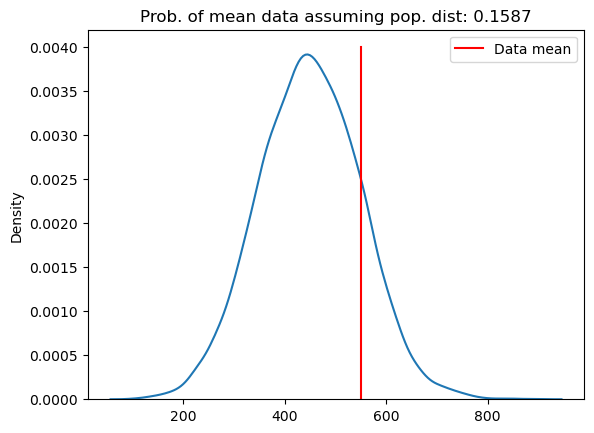

In [52]:
mean_p = 450
std_p = 100
population = np.random.normal(loc = mean_p, scale = std_p, size = 10000) #population of all stores
sample = np.array([485, 562, 415, 860, 426, 474, 662, 380, 515, 721]) #my stores
sns.kdeplot(population);
x = np.ones(50)*sample.mean()
y = np.linspace(0, 0.004, 50)
plt.plot(x, y, 'r', label = 'Data mean');
plt.title("Prob. of mean data assuming pop. dist: " + 
          str(np.round(1-scipy.stats.norm.cdf(sample.mean(), loc = mean_p, scale = std_p),4)))
plt.legend();

